In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

#Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [6]:
#df["Total Charges"]=df["Total Charges"].replace(" ","0")
#df["Total Charges"]=df["Total Charges"].astype("float")

In [4]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [5]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [6]:
df["Customer ID"].duplicated().sum()

0

#converted 0 and 1 of senior citizen to yes/no to make it easier to understand

In [7]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
        
#df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)      
    

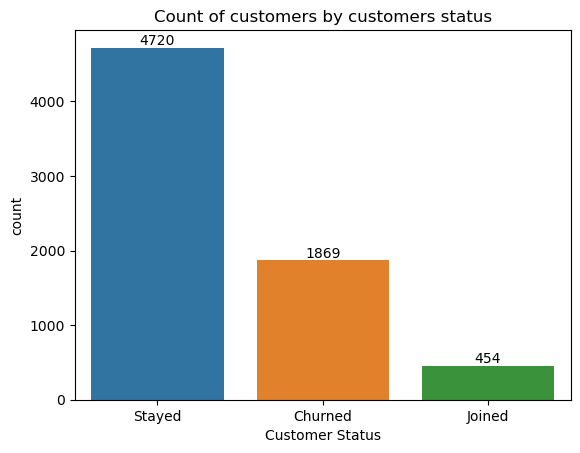

In [8]:
ax=sns.countplot(x='Customer Status',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by customers status")
plt.show()

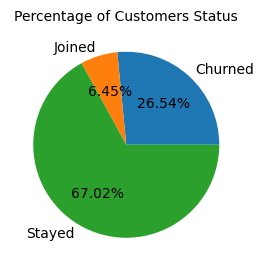

In [9]:
plt.figure(figsize=(3,4))
gb=df.groupby("Customer Status").agg({"Customer Status":"count"})
gb
plt.pie(gb['Customer Status'],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Customers Status",fontsize=10)
plt.show()

#from the given pie chart we can conclude  that 26.54% of our customers churned out.
#Now,let's explore the reason behind it.

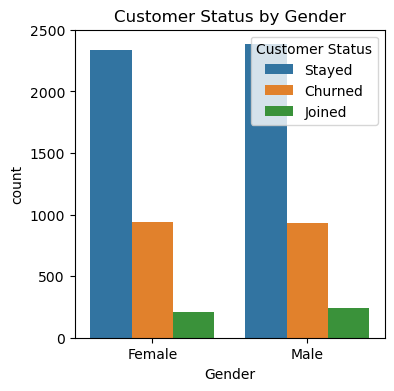

In [10]:
plt.figure(figsize=(4,4))
sns.countplot(x="Gender",data=df,hue="Customer Status")
#t.bar_label(ax.containers[0])
plt.title("Customer Status by Gender")
plt.show()

In [11]:
df["SeniorCitizen"]=df["Age"]>=60
print(df)

     Customer ID  Gender  Age Married  Number of Dependents          City  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Number of Referrals  ...  \
0       

In [51]:
df["SeniorCitizen"]=df["SeniorCitizen"].replace({True:"yes",False:"no"})
print(df)
        

     Customer ID  Gender  Age Married  Number of Dependents          City  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Number of Referrals  ...  \
0       

In [53]:
#df.head(20)

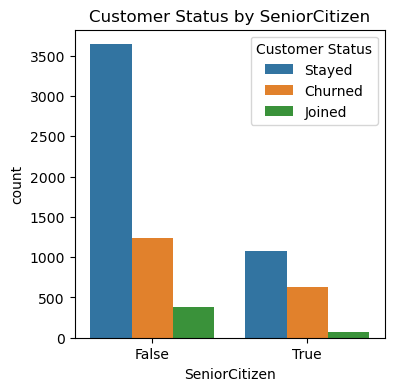

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(x="SeniorCitizen",data=df,hue="Customer Status")
#t.bar_label(ax.containers[0])
plt.title("Customer Status by SeniorCitizen")
plt.show()

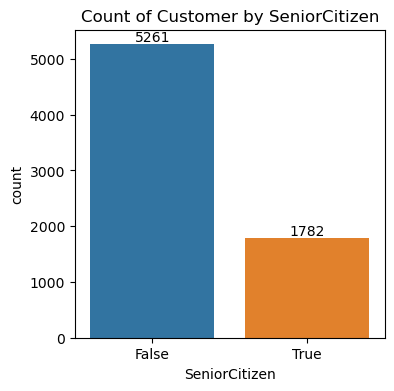

In [13]:
plt.figure(figsize=(4,4))
t=sns.countplot(x="SeniorCitizen",data=df)
t.bar_label(t.containers[0])
plt.title("Count of Customer by SeniorCitizen")
plt.show()

<Figure size 600x600 with 0 Axes>

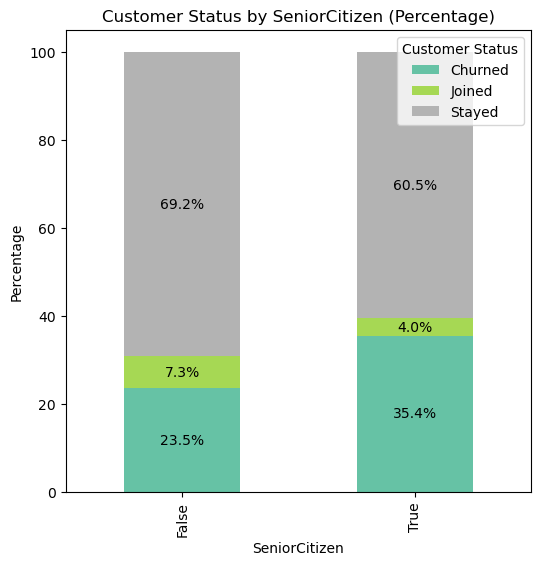

In [14]:

# Assuming you already have the DataFrame df

# Calculate the counts for each combination of SeniorCitizen and Customer Status
grouped_data = df.groupby(['SeniorCitizen', 'Customer Status']).size().unstack(fill_value=0)

# Calculate the percentage of total for each category
grouped_data_percent = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Set up the figure size
plt.figure(figsize=(6, 6))

# Create a stacked bar chart
ax = grouped_data_percent.plot(kind='bar', stacked=True, figsize=(6, 6), colormap='Set2')

# Add percentage labels to each segment of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Add title and labels
plt.title("Customer Status by SeniorCitizen (Percentage)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen")

# Display the plot
plt.show()


#comparatively a greater percentage of people in senior citizen have churned out.

C:\Users\jadha\AppData\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


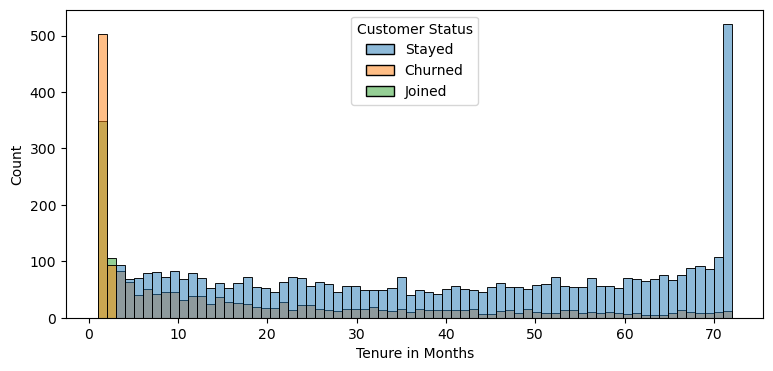

In [15]:
plt.figure(figsize=(9,4))
sns.histplot(x="Tenure in Months",data=df,bins=70,hue="Customer Status")
plt.show()

#people who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned.

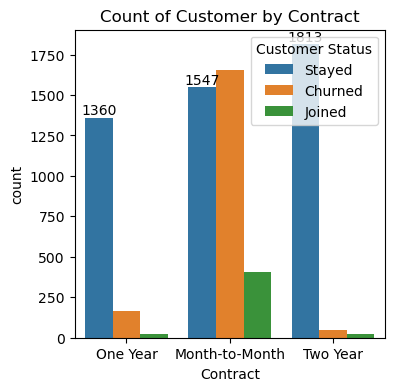

In [16]:
plt.figure(figsize=(4,4))
t=sns.countplot(x="Contract",data=df,hue="Customer Status")
t.bar_label(t.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years of contract.

In [17]:
df.columns.values

array(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status',
       'Churn Category', 'Churn Reason', 'SeniorCitizen'], dtype=object)

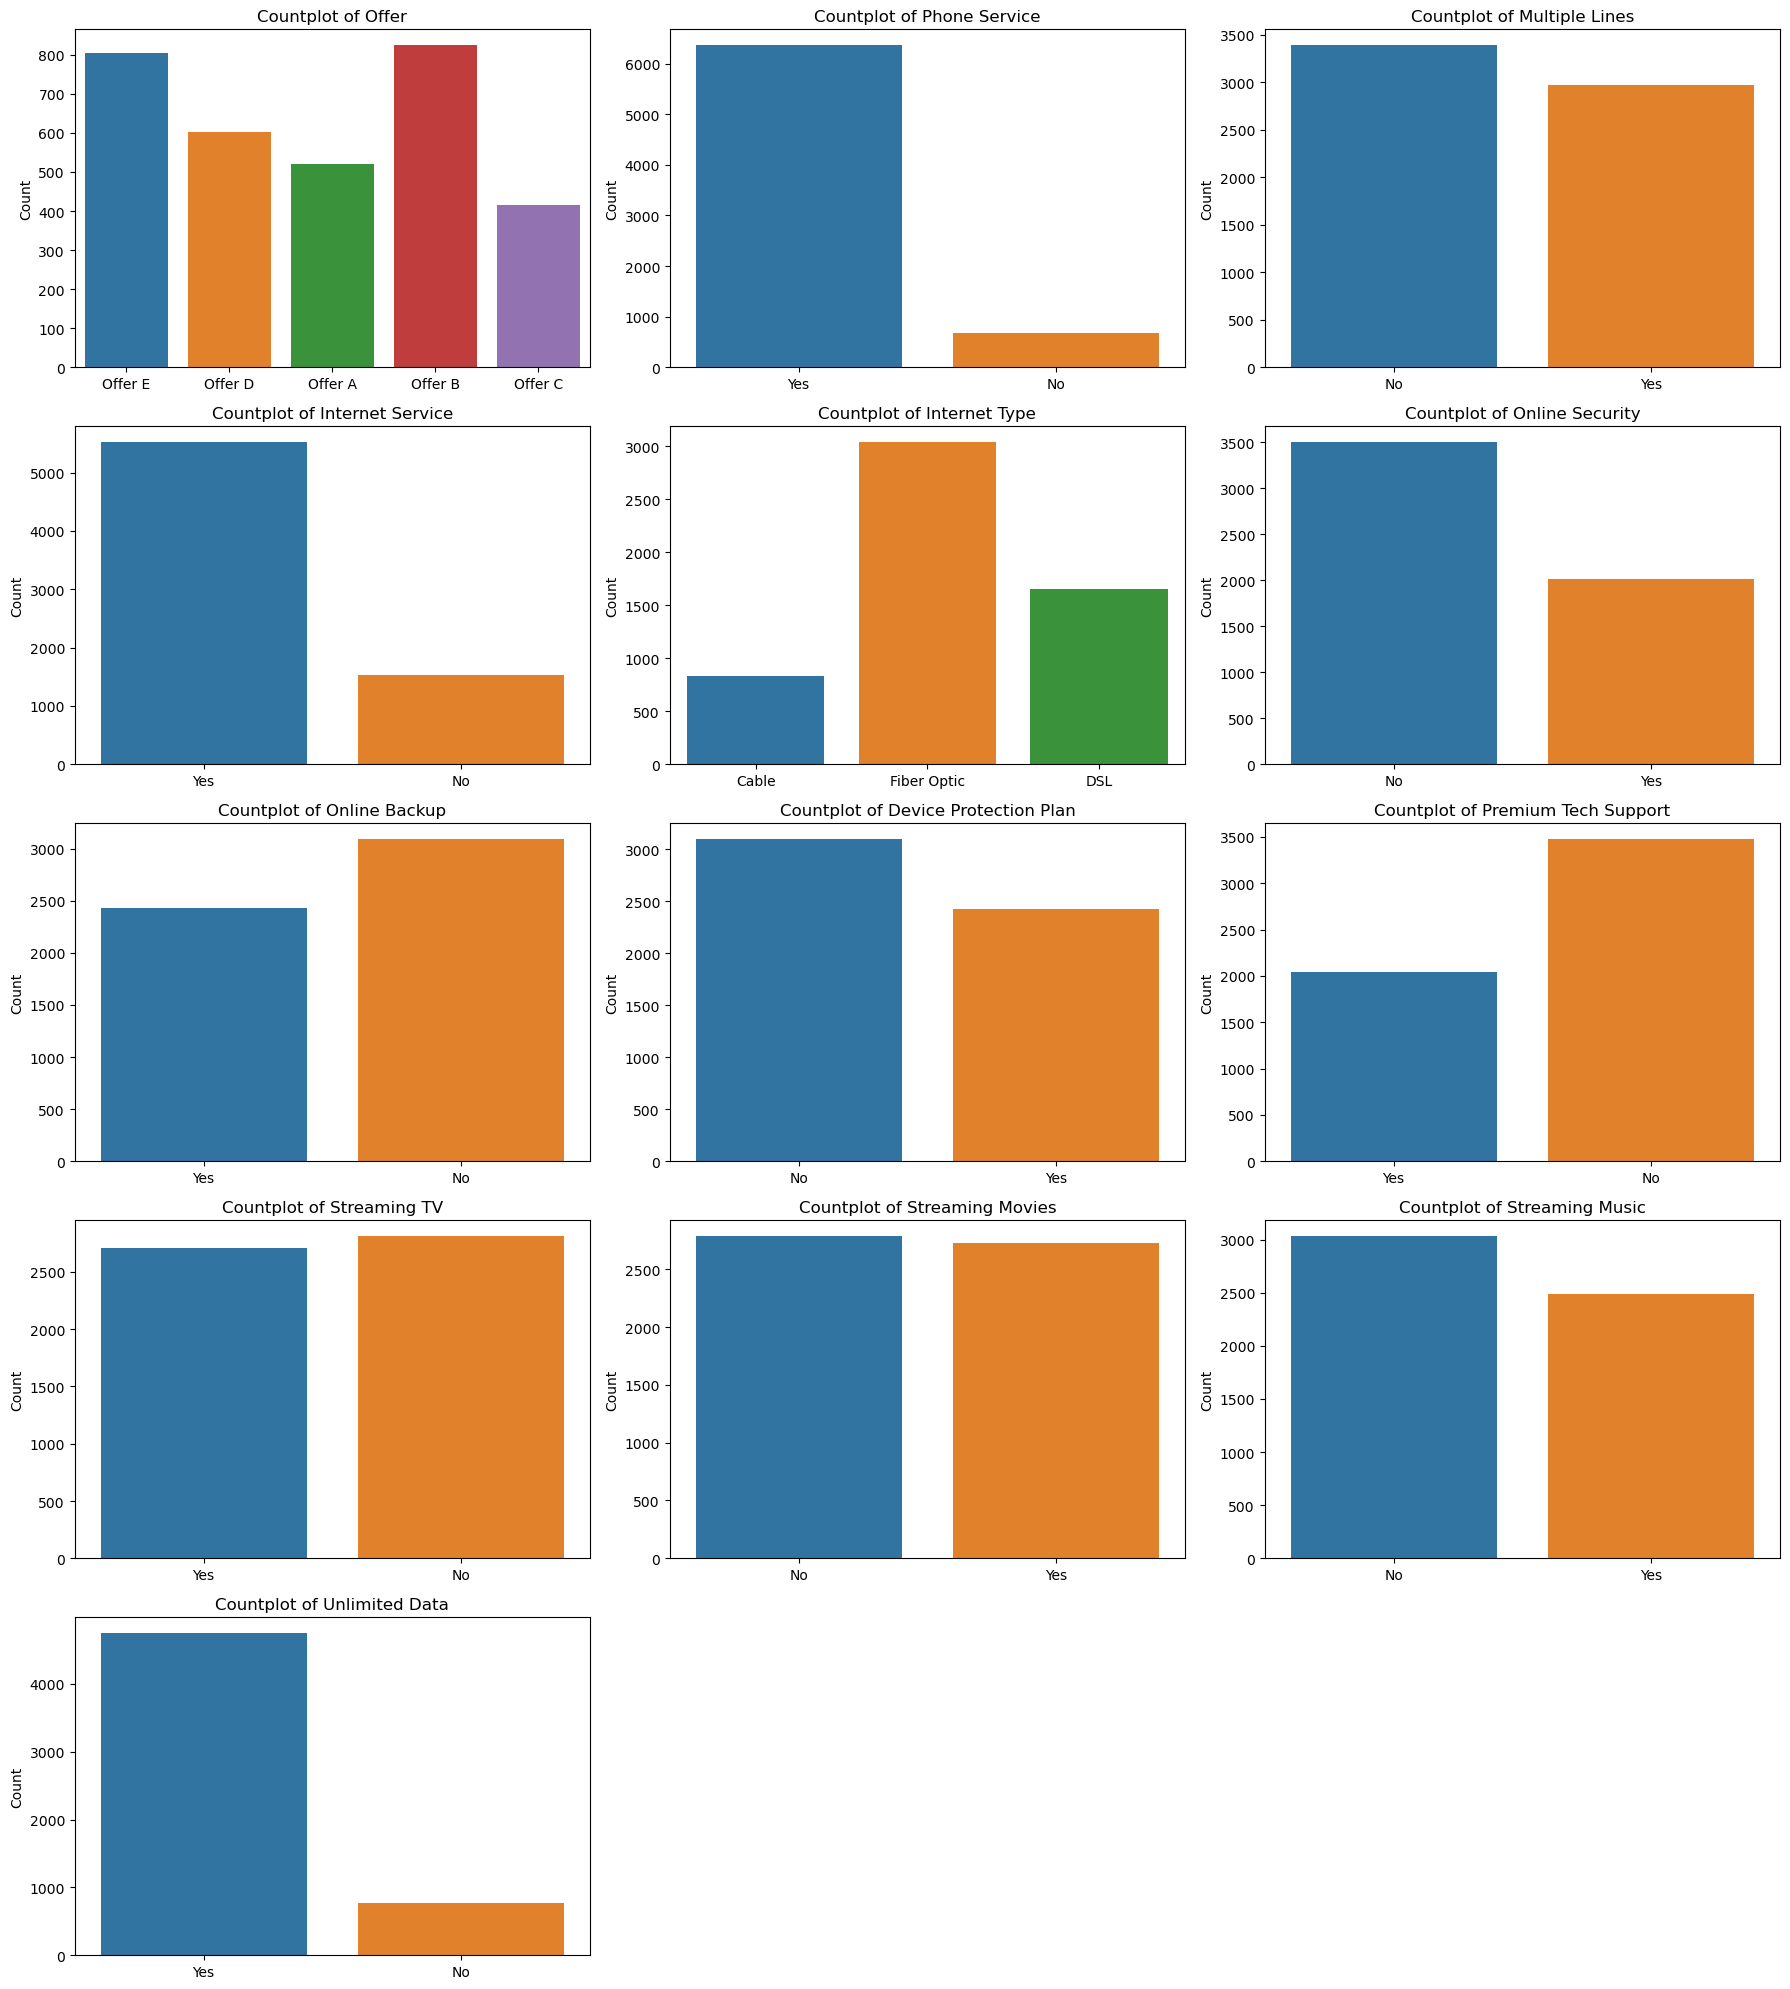

In [18]:

# Assuming your DataFrame is already loaded as df

# List of columns that are categorical
categorical_columns = ['Offer', 'Phone Service', 'Multiple Lines',
                       'Internet Service', 'Internet Type', 'Online Security',
                       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
                       'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']

# Set up the number of rows and columns for the subplots grid
num_plots = len(categorical_columns)
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Adjust rows based on number of plots (3 per row)
cols = 3  # Number of columns in the grid

# Create the subplots grid
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, rows * 4))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop over the categorical columns and create countplots
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('')  # Remove x-axis labels for cleaner look
    axes[i].set_ylabel('Count')

# Remove any empty subplots if the number of columns is not a multiple of the grid size
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


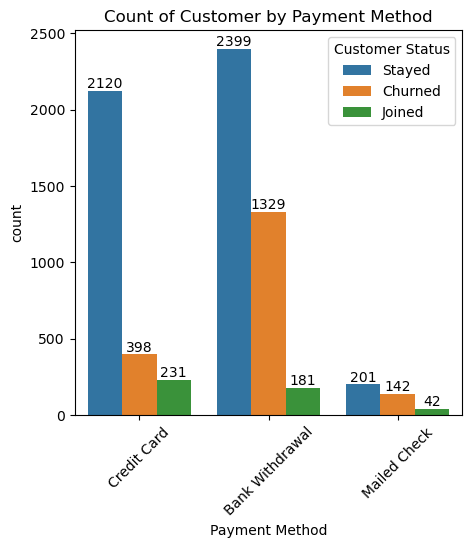

In [19]:
plt.figure(figsize=(5,5))
t=sns.countplot(x="Payment Method",data=df,hue="Customer Status")
t.bar_label(t.containers[0])
t.bar_label(t.containers[1])
t.bar_label(t.containers[2])
plt.xticks(rotation=45)
plt.title("Count of Customer by Payment Method")
plt.show()

#customer is likely to churn when he or she is using bank withdrawal as a payment method.

#Insights:

Most customers(67.02%) stay, but churn (26.54%) needs attention.
gender doesn`t affect churn or retention significantly.
Senior citizen churn more (35.4%) than other groups.
Short-term users(1-2 months) churn more;long-term users stay loyal.
Month-to-Month contracts have higher churn rates than long-term contracts.
Customers using bank withdrawals are more likely to churn.

#Recommandations:

1.Improve onboarding for new users to reduce early churn.
2.Offer senior citizens tailored plans and better support.
3.Encourage long-term contracts with discounts or perks.
4.Provide more payment options and incentives for switching from bank withdrawals.

#Conclusion:

Focusing on reducing churn among short-term users.senior citizens,and specific contract/payment groups can improve 
customer rentation and satisfaction.